In [110]:
#library imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import talib
import warnings
from matplotlib.pyplot import figure
warnings.filterwarnings('ignore')
from datetime import datetime


In [2]:
#data imports
volumes = pd.read_csv('Data/stock_volumes.csv', index_col = 'date', parse_dates = True)
prices = pd.read_csv('Data/stock_prices.csv', index_col = 'date', parse_dates = True)
info = pd.read_csv('Data/stock_info.csv')
sp_listings = pd.read_csv('Data/sp500_listings.csv', index_col = 'date', parse_dates = True)

In [312]:
prices

,905270,921795,904261,905261,916328,923024,936365,902355,912215,929813,...,9889RL,69568X,543755,77463M,29235J,131745,69487D,68157P,9110RA,292703
date,,,,,,,,,,,,,,,,,,,,,
1990-01-02,22.75,12.63,30.00,29.61,3.8736,11.00,4.1250,24.50,58.00,19.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03,22.56,12.57,31.50,29.37,3.8876,11.00,4.0000,24.50,57.75,18.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-04,22.38,12.41,32.25,28.89,3.8806,11.38,3.9375,24.63,57.88,18.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-05,21.81,12.60,32.13,28.41,3.8387,11.50,3.8125,24.75,57.50,18.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-08,22.25,12.49,32.13,29.13,3.8387,11.50,3.8125,25.00,57.75,19.13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-05-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-05-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [264]:
for col in prices.columns:
    #select the stock
    stock = prices[[col]]
    #find delist date
    delist_date = sp_listings.where(sp_listings['stock'] == col).last_valid_index() + pd.DateOffset(1)
    #set all values after delist date to NaN
    stock.loc[delist_date:][col] = np.nan
    #replace in original dataframe
    prices[col] = stock[col]

In [412]:
# Get average monthly prices
prices_m = prices.resample('M').agg('mean')
prices_m.head()

,905270,921795,904261,905261,916328,923024,936365,902355,912215,929813,...,9889RL,69568X,543755,77463M,29235J,131745,69487D,68157P,9110RA,292703
date,,,,,,,,,,,,,,,,,,,,,
1990-01-31,22.131364,11.964091,30.155455,27.145909,3.741100,10.678636,3.801136,24.234545,53.672273,17.854545,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-02-28,23.618947,11.820000,27.358947,25.112105,3.606100,9.443684,3.713816,25.411579,50.081053,18.553684,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-03-31,25.109091,13.569091,29.127273,26.366818,3.606345,9.764091,4.619318,27.895000,50.019545,18.417273,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-04-30,25.309000,13.494000,27.620500,26.207000,3.782735,9.495500,4.381250,27.333500,48.609500,16.896000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-05-31,26.374091,13.621364,25.979545,26.670000,3.968977,9.200909,4.931818,27.786818,50.990909,18.990909,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [413]:
# Get average monthly % volatility
vol_m = prices.copy(deep = True).resample('M').agg('std')*100/prices_volatility.resample('M').agg('mean')
vol_m.head()

,905270,921795,904261,905261,916328,923024,936365,902355,912215,929813,...,9889RL,69568X,543755,77463M,29235J,131745,69487D,68157P,9110RA,292703
date,,,,,,,,,,,,,,,,,,,,,
1990-01-31,2.286540,3.396906,7.106565,5.978230,2.551848,5.273203,3.313309,2.512465,6.451673,3.572404,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-02-28,2.057924,3.511989,1.713009,1.726595,1.258252,4.653072,6.279735,3.048634,1.163387,2.966505,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-03-31,3.818926,2.979546,2.054828,1.940044,1.150957,1.475597,3.466137,1.717846,1.337386,3.675501,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-04-30,1.407139,2.426058,6.263618,1.920222,1.663777,3.171281,3.169616,1.991094,4.388686,2.003993,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-05-31,3.141719,1.645071,3.731192,2.926236,3.212253,2.747060,9.498846,3.041107,2.853439,7.632178,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [414]:
prices_m.shape

(377, 1241)

In [415]:
#rename index to have the following format 'Month (abbreviated) Year'
prices_m.index = prices_m.index.strftime('%b %Y')
vol_m.index = vol_m.index.strftime('%b %Y')

In [434]:
#split each row into its own dataframe and store it in all_months dictionary
all_months = {}

for i in range(1):
    current = pd.concat([prices_m.iloc[i:i+1], vol_m.iloc[i:i+1]])   #take one row at a time
    key = current.index[0]                                           #save the index
    
    #formatting
    current = current.T                                              #transpose so the stocks are in the rows
    current = current.reset_index()
    current = current.rename(columns = {key: 'Price', 'index': 'stock'})
    current = current.set_index('stock')
    
    current.columns = ['price', 'pct_vol']                           #rename columns
    
    #adding relevant fields
    current['return'] = current['price'].pct_change()
    
    current = current.dropna()                                       #drop the stocks that didn't exist in this month
    
    all_months[key] = current                                        #add to dictionary with key 'Month Year'

In [445]:
all_months['Jan 1990']

,price,pct_vol,return
stock,,,
921795,11.964091,3.396906,-0.459406
904261,30.155455,7.106565,1.520497
905261,27.145909,5.978230,-0.099801
916328,3.741100,2.551848,-0.862185
923024,10.678636,5.273203,1.854411
...,...,...,...
541798,2.938559,12.945887,-0.752945
906828,2.311736,4.866613,-0.213310
923298,4.633509,2.533595,1.004341


In [436]:
from sklearn.cluster import KMeans

In [439]:
X = all_months['Jan 1990'][['pct_vol', 'return']].values

In [440]:
model = KMeans(n_clusters = 11)
model.fit(X)

KMeans(n_clusters=11)

In [441]:
labels = model.predict(X)

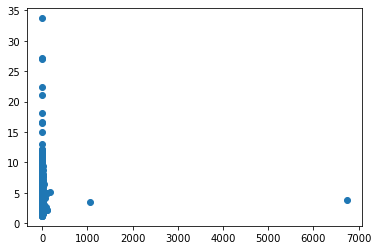

In [446]:
plt.scatter(data = all_months['Jan 1990'], x = 'return', y = 'pct_vol')
plt.show()